<a href="https://colab.research.google.com/github/dgambone3/CSC4850-Machine-Learning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import ConfusionMatrixDisplay


# processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import ComplementNB, MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Project/Diabetes Indicators Dataset/diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
X = df.iloc[:, 1:] # features
X = X.astype(int)
y = df.iloc[:, :1]
y = y.astype(int).values.ravel()

#### Initialize models

In [4]:
from sklearn.model_selection import GridSearchCV
titles = ['Decision Tree Classifier',
          'Perceptron',
          'Compliment Naive Bayes',
          'Multinomial Naive Bayes',
          'Logistic Regression',
          'Linear Regression',
          'SVM - Linear',
          'SVM - RBF',
          'Gradient Boost',
          'Muti-Layer Perceptron',
          'Regularilized Linear Regression',
          'Lasso Linear Regression',
          'k-Nearest Neighbors',
          'Linear Regression with Optimal Polynomial']
          # 'SVM - Linear']

models = [DecisionTreeClassifier(criterion='entropy', splitter='best'),
          Perceptron(class_weight='balanced'),
          ComplementNB(),
          MultinomialNB (),
          LogisticRegression(class_weight='balanced', solver='sag'), 
          LinearRegression(),
          LinearSVC(class_weight='balanced'),#, dual=False),
          SVC(kernel='rbf', decision_function_shape='ovr'),
          GradientBoostingClassifier(),
          MLPClassifier(max_iter=500, hidden_layer_sizes=10),
          SGDRegressor(loss='squared_error', penalty='l2'),
          Lasso(selection='random'),
          KNeighborsClassifier(weights='distance'),
          LinearRegression()]
          # LinearSVC(dual=False)]

# list of split ratios to output onto plots
splits = [(0.5, 0.5), 
          (0.7, 0.3),
          (0.8, 0.2)]

# create labels for fold metrics dataframe
index = []
for i in range(1,11):
  index.append(f'Fold {i}')

# Helper Functions


*   Learning Curves
*   Best Polynomial



### Helper function to get learning curve plot
#### Predicts target variable at every n interval of the dataset to use as points on learning curve plot.

In [5]:
def get_learning_curve(model, X, y, title):
  scores=[]
  perc=[]
  for n in range(1,101):
    perc.append(n)
    XX = X.iloc[0:int(len(X) * (n/100))] #df
    yy = y[0:int(len(y) * (n/100))] #list
    pred = model.predict(XX)
    score = MSE(y_true=yy, y_pred=pred)
    scores.append(score)
  return pd.DataFrame({'percent':perc, 'scores':scores})

### Helper function to find best polynomial for linear regression

In [6]:
def best_poly(X_train, y_train, X_test, y_test):
  degree = [1, 2]
  z = []
  poly_df = pd.DataFrame(columns=['polynomial', 'score'])
  print('   Polynomial Scores')
  for deg in degree:
    linreg = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=deg,
                                             include_bias=False)
    lin_pipe = Pipeline([('scaler', MinMaxScaler()),
                        ("polynomial_features", polynomial_features),
                        ("linear_regression", linreg)])
    lin_pipe.fit(X,y)
    score = lin_pipe.score(X_test,y_test)
    z.append(score)
    print(f'Degree: {deg}  Score: {score}')
  p = z.index(max(z)) + 1
    
  return p 

### Split original data into three seperate ratios
#### Splitting data outside of loop for cohesion. This way assures the same data points are used for all the splits on all the models. 
#### Initialize dataframe labels and plot colors



In [7]:
#### SPLIT FOR FASTER TESTING -  REMOVE FOR FINAL TESTS ####
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, 
                                                                        y, 
                                                                        train_size=0.20)
# Create all three splits outside of loop to run each model on same data splits
X55_train, X55_test, y55_train, y55_test = train_test_split(X_train_temp, 
                                                            y_train_temp, 
                                                            train_size=.5, 
                                                            test_size=.5, 
                                                            shuffle=True,
                                                            random_state=1234)
X73_train, X73_test, y73_train, y73_test = train_test_split(X_train_temp, 
                                                            y_train_temp, 
                                                            train_size=.7, 
                                                            test_size=.3, 
                                                            shuffle=True,
                                                            random_state=1234)
X82_train, X82_test, y82_train, y82_test = train_test_split(X_train_temp, 
                                                            y_train_temp, 
                                                            train_size=.8, 
                                                            test_size=.2, 
                                                            shuffle=True,
                                                            random_state=1234)
# List of train and test motels to access later in loop
train = [(X55_train, y55_train), 
         (X73_train, y73_train), 
         (X82_train, y82_train)]
test = [(X55_test, y55_test),
        (X73_test, y73_test),
        (X82_test, y82_test)]

# initialize lists of color for plots
train_colors = ['navy', 'green', 'firebrick']
test_colors = ['skyblue', 'palegreen', 'salmon']

### Loop to train and test models on all 3 splits and output plots and tables with metric details for each fold, and split

Decision Tree Classifier
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.765471,0.776357,0.765471,0.770765,-0.675618,0.821048
Fold 2,0.771384,0.780858,0.771384,0.776014,-0.627353,0.797399
Fold 3,0.767048,0.773340,0.767048,0.770148,-0.667574,0.817107
Fold 4,0.765865,0.775986,0.765865,0.770819,-0.667574,0.817107
Fold 5,0.749310,0.770909,0.749310,0.759650,-0.771345,0.867954
Fold 6,0.744974,0.763240,0.744974,0.753796,-0.813979,0.888845
Fold 7,0.759559,0.782709,0.759559,0.770406,-0.702164,0.834056
Fold 8,0.774143,0.785391,0.774143,0.779647,-0.578283,0.773354
Fold 9,0.770899,0.780392,0.770899,0.775548,-0.628802,0.798107
Fold 10,0.757886,0.778013,0.757886,0.767458,-0.715158,0.840694


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.778153,0.785950,0.778153,0.781994,-0.573684,0.765766
Fold 2,0.761543,0.778003,0.761543,0.769421,-0.713696,0.833896
Fold 3,0.765766,0.778547,0.765766,0.771965,-0.672040,0.813626
Fold 4,0.768581,0.778959,0.768581,0.773611,-0.671461,0.813345
Fold 5,0.765766,0.775108,0.765766,0.770331,-0.684189,0.819538
Fold 6,0.773867,0.783863,0.773867,0.778764,-0.608859,0.782878
Fold 7,0.750493,0.765867,0.750493,0.757946,-0.797524,0.874683
Fold 8,0.755562,0.770064,0.755562,0.762647,-0.736758,0.845114
Fold 9,0.773022,0.785096,0.773022,0.778959,-0.587176,0.773585
Fold 10,0.766263,0.777207,0.766263,0.771542,-0.691797,0.823430


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.772358,0.781088,0.772358,0.776630,-0.627668,0.796748
Fold 2,0.772850,0.780442,0.772850,0.776600,-0.597974,0.782212
Fold 3,0.764228,0.776909,0.764228,0.770310,-0.704673,0.834442
Fold 4,0.766445,0.777425,0.766445,0.771806,-0.662396,0.813747
Fold 5,0.752895,0.766829,0.752895,0.759701,-0.754034,0.859818
Fold 6,0.754619,0.769140,0.754619,0.761659,-0.752633,0.858093
Fold 7,0.762996,0.775884,0.762996,0.769302,-0.660045,0.812762
Fold 8,0.771126,0.781307,0.771126,0.776108,-0.622305,0.794284
Fold 9,0.771562,0.782749,0.771562,0.777031,-0.609621,0.788073
Fold 10,0.768359,0.778197,0.768359,0.773206,-0.637304,0.801626


Perceptron
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.231770,0.843296,0.231770,0.344324,-0.690902,0.828538
Fold 2,0.742609,0.814374,0.742609,0.770394,-0.787433,0.875838
Fold 3,0.275522,0.841958,0.275522,0.399350,-0.772954,0.868743
Fold 4,0.608987,0.783265,0.608987,0.680360,-0.029664,0.504533
Fold 5,0.664959,0.818171,0.664959,0.715860,-1.358575,1.155696
Fold 6,0.033504,0.783520,0.033504,0.031541,-0.991757,0.975956
Fold 7,0.591250,0.845502,0.591250,0.647527,-2.155761,1.546315
Fold 8,0.837209,0.794596,0.837209,0.803208,-0.159981,0.568388
Fold 9,0.829259,0.788654,0.829259,0.782833,-0.166879,0.571767
Fold 10,0.720820,0.827601,0.720820,0.754284,-1.092460,1.025631


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.795608,0.813380,0.795608,0.802586,-0.527400,0.743243
Fold 2,0.728041,0.818256,0.728041,0.758774,-1.042897,0.994088
Fold 3,0.376689,0.853606,0.376689,0.428041,-3.833872,2.352196
Fold 4,0.694538,0.816769,0.694538,0.742505,-0.985041,0.965935
Fold 5,0.389358,0.853305,0.389358,0.457823,-3.481529,2.180743
Fold 6,0.309209,0.835334,0.309209,0.437417,-0.693932,0.824275
Fold 7,0.228386,0.841350,0.228386,0.338989,-0.764537,0.858631
Fold 8,0.208674,0.883134,0.208674,0.311474,-0.667889,0.811602
Fold 9,0.732188,0.830575,0.732188,0.765737,-0.915357,0.933540
Fold 10,0.306111,0.881621,0.306111,0.430041,-0.507226,0.733596


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.715201,0.823965,0.715201,0.758149,-0.791240,0.876817
Fold 2,0.746243,0.822462,0.746243,0.779557,-0.537578,0.752648
Fold 3,0.779995,0.811531,0.779995,0.787721,-0.160607,0.568120
Fold 4,0.814979,0.801883,0.814979,0.807750,-0.311093,0.641784
Fold 5,0.823109,0.784794,0.823109,0.785654,-0.178068,0.577482
Fold 6,0.358463,0.811680,0.358463,0.483847,-0.370707,0.671101
Fold 7,0.824095,0.791589,0.824095,0.800806,-0.231825,0.603104
Fold 8,0.630697,0.858273,0.630697,0.699654,-0.039604,0.508992
Fold 9,0.428290,0.856464,0.428290,0.558015,-0.379100,0.675209
Fold 10,0.790044,0.804558,0.790044,0.768401,-0.088684,0.533021


Compliment Naive Bayes
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.731573,0.817891,0.731573,0.758040,-1.082657,1.020497
Fold 2,0.745369,0.814828,0.745369,0.767945,-0.970038,0.965313
Fold 3,0.718959,0.807560,0.718959,0.747418,-1.185624,1.070950
Fold 4,0.713835,0.806004,0.713835,0.743703,-1.227454,1.091447
Fold 5,0.723689,0.809966,0.723689,0.751739,-1.147011,1.052030
Fold 6,0.724478,0.811744,0.724478,0.752458,-1.140576,1.048877
Fold 7,0.716200,0.810362,0.716200,0.746084,-1.208148,1.081987
Fold 8,0.733544,0.821457,0.733544,0.760588,-1.066569,1.012613
Fold 9,0.741719,0.822556,0.741719,0.766668,-1.002204,0.981073
Fold 10,0.725946,0.814315,0.725946,0.753987,-1.127858,1.042981


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.729167,0.816312,0.729167,0.756773,-1.115217,1.029279
Fold 2,0.728604,0.810063,0.728604,0.755404,-1.119845,1.031532
Fold 3,0.737331,0.813176,0.737331,0.762015,-1.048104,0.996622
Fold 4,0.742399,0.818788,0.742399,0.766597,-1.006448,0.976351
Fold 5,0.721847,0.806792,0.721847,0.749442,-1.175387,1.058559
Fold 6,0.712475,0.806820,0.712475,0.743200,-1.254139,1.096874
Fold 7,0.727119,0.810450,0.727119,0.754309,-1.133764,1.038299
Fold 8,0.721205,0.815879,0.721205,0.751055,-1.182377,1.061954
Fold 9,0.732470,0.822808,0.732470,0.760007,-1.086382,1.016897
Fold 10,0.733596,0.816807,0.733596,0.760020,-1.076559,1.010701


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.724809,0.801160,0.724809,0.750568,-1.141536,1.048288
Fold 2,0.731707,0.813889,0.731707,0.758147,-1.085167,1.020695
Fold 3,0.728505,0.812016,0.728505,0.755674,-1.111338,1.033506
Fold 4,0.735403,0.814428,0.735403,0.760764,-1.054969,1.005913
Fold 5,0.737127,0.814816,0.737127,0.762003,-1.037997,0.999015
Fold 6,0.711259,0.806127,0.711259,0.741675,-1.250295,1.101749
Fold 7,0.722099,0.807194,0.722099,0.750046,-1.161732,1.058389
Fold 8,0.723577,0.815616,0.723577,0.752402,-1.148146,1.051737
Fold 9,0.727452,0.818112,0.727452,0.755699,-1.119486,1.037703
Fold 10,0.735584,0.820107,0.735584,0.761983,-1.051537,1.004436


Multinomial Naive Bayes
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.839180,0.794155,0.839180,0.808308,-0.204225,0.590067
Fold 2,0.833268,0.777781,0.833268,0.795678,-0.252490,0.613717
Fold 3,0.837603,0.789497,0.837603,0.803891,-0.217096,0.596374
Fold 4,0.834450,0.785851,0.834450,0.801769,-0.242837,0.608987
Fold 5,0.824202,0.771985,0.824202,0.791713,-0.326497,0.649980
Fold 6,0.834450,0.784221,0.834450,0.800389,-0.242837,0.608987
Fold 7,0.841939,0.796090,0.841939,0.808978,-0.181701,0.579030
Fold 8,0.838786,0.794285,0.838786,0.808097,-0.207443,0.591644
Fold 9,0.841877,0.793811,0.841877,0.806787,-0.184583,0.580442
Fold 10,0.832808,0.785333,0.832808,0.801563,-0.255798,0.615536


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.842905,0.798498,0.842905,0.812276,-0.180263,0.574324
Fold 2,0.838119,0.789767,0.838119,0.805414,-0.219605,0.593468
Fold 3,0.833615,0.782457,0.833615,0.799833,-0.256633,0.611486
Fold 4,0.839809,0.789795,0.839809,0.804804,-0.205720,0.586712
Fold 5,0.835867,0.787422,0.835867,0.803091,-0.238119,0.602477
Fold 6,0.833568,0.784218,0.833568,0.801096,-0.258730,0.612504
Fold 7,0.826809,0.773461,0.826809,0.793143,-0.314288,0.639538
Fold 8,0.841453,0.795322,0.841453,0.808911,-0.193912,0.580963
Fold 9,0.841172,0.795984,0.841172,0.809859,-0.194282,0.582090
Fold 10,0.836103,0.788462,0.836103,0.804009,-0.235868,0.601521


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.836167,0.785508,0.836167,0.800775,-0.231572,0.602858
Fold 2,0.839616,0.794487,0.839616,0.808915,-0.203387,0.589061
Fold 3,0.839123,0.791895,0.839123,0.806762,-0.207414,0.591032
Fold 4,0.835920,0.786908,0.835920,0.802738,-0.233585,0.603843
Fold 5,0.835181,0.784459,0.835181,0.800784,-0.237876,0.606800
Fold 6,0.837398,0.790670,0.837398,0.805340,-0.219748,0.597191
Fold 7,0.825326,0.773338,0.825326,0.792788,-0.318375,0.645479
Fold 8,0.838877,0.790713,0.838877,0.804976,-0.207671,0.591279
Fold 9,0.838344,0.793076,0.838344,0.807542,-0.213508,0.594135
Fold 10,0.836619,0.788640,0.836619,0.803596,-0.227601,0.601035


Logistic Regression
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.690185,0.791121,0.690185,0.728350,-0.349021,0.661017
Fold 2,0.281435,0.871806,0.281435,0.402676,-0.968429,0.964525
Fold 3,0.558928,0.807906,0.558928,0.651824,-0.385221,0.678754
Fold 4,0.093023,0.869919,0.093023,0.047389,-2.825043,1.874261
Fold 5,0.201419,0.850622,0.201419,0.216227,-3.315742,2.114702
Fold 6,0.550650,0.825337,0.550650,0.615863,-2.311015,1.622389
Fold 7,0.288530,0.860875,0.288530,0.340883,-2.532232,1.730784
Fold 8,0.634608,0.831981,0.634608,0.714766,-0.329715,0.651557
Fold 9,0.586356,0.793355,0.586356,0.647539,-2.077342,1.507886
Fold 10,0.268139,0.856611,0.268139,0.371999,-1.485048,1.218060


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.294482,0.812243,0.294482,0.311159,-4.671049,2.759572
Fold 2,0.411318,0.852932,0.411318,0.460614,-3.620384,2.248311
Fold 3,0.669200,0.789885,0.669200,0.711150,-1.493595,1.213401
Fold 4,0.563626,0.835302,0.563626,0.660691,-0.228284,0.597691
Fold 5,0.469876,0.833806,0.469876,0.562131,-2.024714,1.471847
Fold 6,0.399043,0.854307,0.399043,0.462568,-3.023306,1.957758
Fold 7,0.740636,0.780749,0.740636,0.749548,-0.220534,0.593917
Fold 8,0.520417,0.806120,0.520417,0.599371,-2.360664,1.635314
Fold 9,0.721487,0.813938,0.721487,0.752082,-0.150370,0.560687
Fold 10,0.510560,0.852523,0.510560,0.616575,-0.199995,0.584061


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.728012,0.799471,0.728012,0.761191,-0.517446,0.742794
Fold 2,0.702143,0.829808,0.702143,0.741894,-1.154622,1.054693
Fold 3,0.453067,0.838644,0.453067,0.577931,-0.719772,0.841833
Fold 4,0.729244,0.818972,0.729244,0.761896,-0.125376,0.550875
Fold 5,0.770880,0.777387,0.770880,0.767296,-0.314772,0.644494
Fold 6,0.737620,0.806478,0.737620,0.766270,-0.761691,0.862528
Fold 7,0.190195,0.792481,0.190195,0.241943,-2.587791,1.756590
Fold 8,0.253757,0.843769,0.253757,0.244435,-4.906520,2.891845
Fold 9,0.534746,0.848595,0.534746,0.610315,-2.080829,1.508379
Fold 10,0.671020,0.784734,0.671020,0.718789,0.077412,0.451700


Linear Regression
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.179740,0.410948
Fold 2,nan,nan,nan,nan,0.155839,0.403504
Fold 3,nan,nan,nan,nan,0.167434,0.420395
Fold 4,nan,nan,nan,nan,0.176701,0.434464
Fold 5,nan,nan,nan,nan,0.150223,0.423671
Fold 6,nan,nan,nan,nan,0.152194,0.398315
Fold 7,nan,nan,nan,nan,0.165416,0.394321
Fold 8,nan,nan,nan,nan,0.206637,0.391623
Fold 9,nan,nan,nan,nan,0.193926,0.397772
Fold 10,nan,nan,nan,nan,0.160375,0.384906


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.190645,0.385023
Fold 2,nan,nan,nan,nan,0.155632,0.398539
Fold 3,nan,nan,nan,nan,0.173398,0.415980
Fold 4,nan,nan,nan,nan,0.173537,0.395195
Fold 5,nan,nan,nan,nan,0.158460,0.418514
Fold 6,nan,nan,nan,nan,0.173100,0.429023
Fold 7,nan,nan,nan,nan,0.149704,0.412905
Fold 8,nan,nan,nan,nan,0.173109,0.398906
Fold 9,nan,nan,nan,nan,0.197745,0.390729
Fold 10,nan,nan,nan,nan,0.172619,0.385107


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.165297,0.422274
Fold 2,nan,nan,nan,nan,0.187557,0.395448
Fold 3,nan,nan,nan,nan,0.161399,0.397633
Fold 4,nan,nan,nan,nan,0.177765,0.412989
Fold 5,nan,nan,nan,nan,0.157469,0.401069
Fold 6,nan,nan,nan,nan,0.166634,0.429664
Fold 7,nan,nan,nan,nan,0.163962,0.424298
Fold 8,nan,nan,nan,nan,0.161951,0.388402
Fold 9,nan,nan,nan,nan,0.193981,0.395422
Fold 10,nan,nan,nan,nan,0.177096,0.388793


SVM - Linear
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.818683,0.817921,0.818683,0.817662,-0.364305,0.668506
Fold 2,0.819078,0.808151,0.819078,0.813551,-0.361088,0.666929
Fold 3,0.815924,0.819501,0.815924,0.813540,-0.394069,0.683090
Fold 4,0.821048,0.814776,0.821048,0.817753,-0.335346,0.654316
Fold 5,0.816713,0.809716,0.816713,0.813047,-0.380394,0.676389
Fold 6,0.811194,0.818284,0.811194,0.812821,-0.423029,0.697280
Fold 7,0.821048,0.818381,0.821048,0.819232,-0.347413,0.660229
Fold 8,0.825384,0.818150,0.825384,0.821580,-0.309605,0.641703
Fold 9,0.822555,0.819586,0.822555,0.820108,-0.330242,0.651814
Fold 10,0.815852,0.817067,0.815852,0.815698,-0.384515,0.678628


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.830236,0.827430,0.830236,0.827025,-0.277461,0.621622
Fold 2,0.815878,0.814198,0.815878,0.814575,-0.392016,0.677365
Fold 3,0.818694,0.814484,0.818694,0.815637,-0.368874,0.666104
Fold 4,0.821791,0.818021,0.821791,0.819134,-0.339946,0.652027
Fold 5,0.810811,0.810097,0.810811,0.808695,-0.437144,0.699324
Fold 6,0.817516,0.814794,0.817516,0.815880,-0.366373,0.664883
Fold 7,0.811039,0.812500,0.811039,0.810956,-0.424824,0.693326
Fold 8,0.818079,0.817486,0.818079,0.817281,-0.370424,0.666854
Fold 9,0.822022,0.820878,0.822022,0.821031,-0.327172,0.646860
Fold 10,0.821740,0.821962,0.821740,0.820438,-0.345221,0.654745


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.817689,0.811217,0.817689,0.813872,-0.368973,0.670116
Fold 2,0.825080,0.821976,0.825080,0.822216,-0.313107,0.642769
Fold 3,0.815225,0.813417,0.815225,0.813943,-0.387595,0.679231
Fold 4,0.820892,0.818823,0.820892,0.818331,-0.348841,0.660261
Fold 5,0.815472,0.810624,0.815472,0.812877,-0.377595,0.675289
Fold 6,0.813008,0.812683,0.813008,0.811957,-0.405428,0.688101
Fold 7,0.814486,0.809551,0.814486,0.811841,-0.387313,0.679231
Fold 8,0.820153,0.822794,0.820153,0.820495,-0.341019,0.656566
Fold 9,0.819616,0.817326,0.819616,0.818102,-0.349908,0.660917
Fold 10,0.818383,0.820953,0.818383,0.818504,-0.362994,0.667324


SVM - RBF
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.846275,0.809325,0.846275,0.784179,-0.146306,0.561687
Fold 2,0.842728,0.781887,0.842728,0.782255,-0.175265,0.575877
Fold 3,0.841545,0.777205,0.841545,0.780811,-0.184919,0.580607
Fold 4,0.842728,0.784545,0.842728,0.784571,-0.175265,0.575877
Fold 5,0.840363,0.772523,0.840363,0.779367,-0.194572,0.585337
Fold 6,0.845093,0.800105,0.845093,0.786333,-0.155959,0.566417
Fold 7,0.844304,0.794807,0.844304,0.781106,-0.162395,0.569570
Fold 8,0.844698,0.800463,0.844698,0.783630,-0.159177,0.567994
Fold 9,0.841877,0.779505,0.841877,0.778433,-0.184583,0.580442
Fold 10,0.841088,0.778855,0.841088,0.780854,-0.188221,0.582413


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.848255,0.809240,0.848255,0.790991,-0.136293,0.552928
Fold 2,0.845721,0.797539,0.845721,0.787659,-0.157121,0.563063
Fold 3,0.848536,0.808608,0.848536,0.790914,-0.133978,0.551802
Fold 4,0.846284,0.799023,0.846284,0.786876,-0.152492,0.560811
Fold 5,0.844032,0.788944,0.844032,0.785354,-0.171006,0.569820
Fold 6,0.844551,0.787732,0.844551,0.787425,-0.168448,0.568572
Fold 7,0.842298,0.780860,0.842298,0.784954,-0.186968,0.577584
Fold 8,0.845959,0.796894,0.845959,0.787660,-0.156874,0.562940
Fold 9,0.843424,0.785058,0.843424,0.784624,-0.175793,0.573078
Fold 10,0.843988,0.790070,0.843988,0.785637,-0.171066,0.569980


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.845528,0.803348,0.845528,0.784202,-0.155071,0.565410
Fold 2,0.846760,0.806615,0.846760,0.788410,-0.145005,0.560483
Fold 3,0.847253,0.803949,0.847253,0.791435,-0.140978,0.558512
Fold 4,0.847499,0.808063,0.847499,0.789389,-0.138965,0.557526
Fold 5,0.842326,0.782499,0.842326,0.782216,-0.179575,0.578221
Fold 6,0.844789,0.792770,0.844789,0.788351,-0.159365,0.567627
Fold 7,0.843065,0.786791,0.843065,0.785312,-0.173454,0.574526
Fold 8,0.845775,0.799760,0.845775,0.787017,-0.151313,0.563686
Fold 9,0.844258,0.791946,0.844258,0.785446,-0.165189,0.570478
Fold 10,0.843519,0.790339,0.843519,0.784082,-0.171229,0.573435


Gradient Boost
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.847458,0.802780,0.847458,0.810615,-0.136653,0.556957
Fold 2,0.844304,0.794118,0.844304,0.803553,-0.159981,0.568388
Fold 3,0.842728,0.792661,0.842728,0.803874,-0.175265,0.575877
Fold 4,0.849034,0.805096,0.849034,0.812091,-0.121369,0.549468
Fold 5,0.846275,0.800301,0.846275,0.808597,-0.146306,0.561687
Fold 6,0.846669,0.802372,0.846669,0.811361,-0.140675,0.558928
Fold 7,0.846669,0.800279,0.846669,0.808168,-0.143088,0.560110
Fold 8,0.849823,0.807530,0.849823,0.814597,-0.117347,0.547497
Fold 9,0.850552,0.809257,0.850552,0.813092,-0.111352,0.544558
Fold 10,0.847792,0.804762,0.847792,0.814954,-0.131103,0.554416


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.851633,0.808922,0.851633,0.813962,-0.108522,0.539414
Fold 2,0.853604,0.813044,0.853604,0.817173,-0.090586,0.530687
Fold 3,0.846284,0.798693,0.846284,0.804540,-0.149021,0.559122
Fold 4,0.846284,0.798806,0.846284,0.809210,-0.152492,0.560811
Fold 5,0.846847,0.799328,0.846847,0.805874,-0.146128,0.557714
Fold 6,0.850465,0.807124,0.850465,0.815328,-0.119835,0.544917
Fold 7,0.846804,0.799863,0.846804,0.808353,-0.149929,0.559561
Fold 8,0.847930,0.801444,0.847930,0.808266,-0.140670,0.555055
Fold 9,0.852718,0.811787,0.852718,0.818834,-0.099525,0.535905
Fold 10,0.851591,0.810189,0.851591,0.817212,-0.106842,0.538721


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.845528,0.798503,0.845528,0.804594,-0.153561,0.564671
Fold 2,0.852180,0.810686,0.852180,0.815679,-0.100714,0.538803
Fold 3,0.849717,0.806531,0.849717,0.812827,-0.120846,0.548657
Fold 4,0.847007,0.800234,0.847007,0.805589,-0.141482,0.558758
Fold 5,0.845775,0.797887,0.845775,0.806225,-0.151430,0.564425
Fold 6,0.849470,0.805147,0.849470,0.811661,-0.121122,0.548904
Fold 7,0.846760,0.801349,0.846760,0.809665,-0.141753,0.559005
Fold 8,0.850702,0.807848,0.850702,0.812437,-0.111058,0.543976
Fold 9,0.849926,0.807296,0.849926,0.814153,-0.118883,0.547807
Fold 10,0.852637,0.812940,0.852637,0.819501,-0.096737,0.536964


Muti-Layer Perceptron
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.845093,0.802520,0.845093,0.814304,-0.155959,0.566417
Fold 2,0.845487,0.796062,0.845487,0.802692,-0.152742,0.564840
Fold 3,0.845881,0.800653,0.845881,0.811170,-0.149524,0.563264
Fold 4,0.849823,0.806496,0.849823,0.812403,-0.117347,0.547497
Fold 5,0.839574,0.789654,0.839574,0.802373,-0.198594,0.587308
Fold 6,0.848640,0.804663,0.848640,0.807212,-0.127000,0.552227
Fold 7,0.845093,0.796564,0.845093,0.805007,-0.155959,0.566417
Fold 8,0.849034,0.806628,0.849034,0.802898,-0.123782,0.550650
Fold 9,0.848186,0.802641,0.848186,0.803699,-0.133080,0.555205
Fold 10,0.848580,0.804092,0.848580,0.809403,-0.127081,0.552445


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.850225,0.808055,0.850225,0.817495,-0.120093,0.545045
Fold 2,0.851070,0.807898,0.851070,0.805871,-0.113150,0.541667
Fold 3,0.847128,0.798943,0.847128,0.798516,-0.145550,0.557432
Fold 4,0.847691,0.799980,0.847691,0.806849,-0.140921,0.555180
Fold 5,0.845721,0.798393,0.845721,0.807632,-0.157121,0.563063
Fold 6,0.848212,0.802463,0.848212,0.810909,-0.138355,0.553928
Fold 7,0.843424,0.794128,0.843424,0.805406,-0.177708,0.573078
Fold 8,0.847930,0.800537,0.847930,0.808168,-0.140670,0.555055
Fold 9,0.854126,0.815667,0.854126,0.814083,-0.087969,0.530273
Fold 10,0.849057,0.805743,0.849057,0.814130,-0.129407,0.549704


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.848238,0.804427,0.848238,0.799384,-0.132926,0.554570
Fold 2,0.849717,0.805987,0.849717,0.810848,-0.120846,0.548657
Fold 3,0.850456,0.807422,0.850456,0.814241,-0.114807,0.545701
Fold 4,0.846760,0.798484,0.846760,0.799215,-0.145005,0.560483
Fold 5,0.847007,0.801041,0.847007,0.808257,-0.141379,0.559497
Fold 6,0.847007,0.803228,0.847007,0.813309,-0.141250,0.558758
Fold 7,0.844297,0.793757,0.844297,0.801581,-0.163390,0.569598
Fold 8,0.845528,0.795419,0.845528,0.794671,-0.153326,0.564671
Fold 9,0.848694,0.804538,0.848694,0.811343,-0.128950,0.552735
Fold 10,0.851651,0.811167,0.851651,0.819084,-0.104790,0.540907


Regularilized Linear Regression
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.177203,0.412219
Fold 2,nan,nan,nan,nan,0.147848,0.407324
Fold 3,nan,nan,nan,nan,0.161950,0.423164
Fold 4,nan,nan,nan,nan,0.166053,0.440083
Fold 5,nan,nan,nan,nan,0.143258,0.427144
Fold 6,nan,nan,nan,nan,0.146727,0.400883
Fold 7,nan,nan,nan,nan,0.165159,0.394443
Fold 8,nan,nan,nan,nan,0.192594,0.398555
Fold 9,nan,nan,nan,nan,0.192188,0.398630
Fold 10,nan,nan,nan,nan,0.144786,0.392052


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.183538,0.388404
Fold 2,nan,nan,nan,nan,0.152681,0.399931
Fold 3,nan,nan,nan,nan,0.169081,0.418153
Fold 4,nan,nan,nan,nan,0.169983,0.396894
Fold 5,nan,nan,nan,nan,0.149951,0.422746
Fold 6,nan,nan,nan,nan,0.166651,0.432369
Fold 7,nan,nan,nan,nan,0.143921,0.415713
Fold 8,nan,nan,nan,nan,0.169479,0.400658
Fold 9,nan,nan,nan,nan,0.190873,0.394076
Fold 10,nan,nan,nan,nan,0.167603,0.387442


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.153404,0.428291
Fold 2,nan,nan,nan,nan,0.183664,0.397343
Fold 3,nan,nan,nan,nan,0.159551,0.398510
Fold 4,nan,nan,nan,nan,0.164108,0.419849
Fold 5,nan,nan,nan,nan,0.151945,0.403698
Fold 6,nan,nan,nan,nan,0.160433,0.432860
Fold 7,nan,nan,nan,nan,0.160396,0.426108
Fold 8,nan,nan,nan,nan,0.158753,0.389884
Fold 9,nan,nan,nan,nan,0.187741,0.398484
Fold 10,nan,nan,nan,nan,0.173357,0.390560


Lasso Linear Regression
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,-0.000154,0.501074
Fold 2,nan,nan,nan,nan,-0.000360,0.478167
Fold 3,nan,nan,nan,nan,-0.000153,0.505016
Fold 4,nan,nan,nan,nan,-0.001993,0.528763
Fold 5,nan,nan,nan,nan,-0.000347,0.498741
Fold 6,nan,nan,nan,nan,-0.000685,0.470140
Fold 7,nan,nan,nan,nan,-0.000364,0.472648
Fold 8,nan,nan,nan,nan,-0.000025,0.493636
Fold 9,nan,nan,nan,nan,-0.000001,0.493469
Fold 10,nan,nan,nan,nan,-0.001161,0.458958


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,-0.000090,0.475759
Fold 2,nan,nan,nan,nan,-0.000299,0.472137
Fold 3,nan,nan,nan,nan,-0.000282,0.503383
Fold 4,nan,nan,nan,nan,-0.000117,0.478232
Fold 5,nan,nan,nan,nan,-0.000045,0.497342
Fold 6,nan,nan,nan,nan,-0.001506,0.519615
Fold 7,nan,nan,nan,nan,-0.000006,0.485604
Fold 8,nan,nan,nan,nan,-0.000012,0.482423
Fold 9,nan,nan,nan,nan,-0.000009,0.487043
Fold 10,nan,nan,nan,nan,-0.000540,0.465705


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,-0.000254,0.506026
Fold 2,nan,nan,nan,nan,-0.000002,0.486741
Fold 3,nan,nan,nan,nan,-0.000314,0.474311
Fold 4,nan,nan,nan,nan,-0.000177,0.502365
Fold 5,nan,nan,nan,nan,-0.000327,0.476184
Fold 6,nan,nan,nan,nan,-0.000742,0.515958
Fold 7,nan,nan,nan,nan,-0.000712,0.507872
Fold 8,nan,nan,nan,nan,-0.000923,0.463888
Fold 9,nan,nan,nan,nan,-0.000000,0.490587
Fold 10,nan,nan,nan,nan,-0.000354,0.472633


k-Nearest Neighbors
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.824596,0.784366,0.824596,0.800405,-0.311213,0.642491
Fold 2,0.815136,0.763857,0.815136,0.784503,-0.390851,0.681514
Fold 3,0.821837,0.776473,0.821837,0.794065,-0.331324,0.652345
Fold 4,0.822231,0.778897,0.822231,0.796116,-0.332933,0.653134
Fold 5,0.811983,0.766090,0.811983,0.785092,-0.409353,0.690579
Fold 6,0.808041,0.767063,0.808041,0.784935,-0.448770,0.709894
Fold 7,0.820654,0.784975,0.820654,0.797981,-0.350630,0.661805
Fold 8,0.815924,0.770187,0.815924,0.788023,-0.360283,0.666535
Fold 9,0.820978,0.774896,0.820978,0.793010,-0.340704,0.656940
Fold 10,0.823738,0.786636,0.823738,0.802068,-0.317743,0.645899


(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.823198,0.783691,0.823198,0.799921,-0.328375,0.646396
Fold 2,0.823761,0.779559,0.823761,0.797413,-0.332425,0.648367
Fold 3,0.826014,0.782275,0.826014,0.799296,-0.305232,0.635135
Fold 4,0.822635,0.776717,0.822635,0.794847,-0.333003,0.648649
Fold 5,0.820101,0.772759,0.820101,0.791329,-0.353831,0.658784
Fold 6,0.823148,0.778501,0.823148,0.796111,-0.335700,0.649958
Fold 7,0.811884,0.768633,0.811884,0.787034,-0.424824,0.693326
Fold 8,0.818361,0.778646,0.818361,0.795351,-0.368109,0.665728
Fold 9,0.818643,0.776658,0.818643,0.793995,-0.363573,0.664602
Fold 10,0.822022,0.782733,0.822022,0.797787,-0.339435,0.651929


(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,0.811776,0.767964,0.811776,0.786042,-0.406720,0.688593
Fold 2,0.822616,0.780376,0.822616,0.797169,-0.327199,0.649667
Fold 3,0.819167,0.778305,0.819167,0.795343,-0.358403,0.664942
Fold 4,0.828036,0.784784,0.828036,0.800909,-0.282909,0.627987
Fold 5,0.822370,0.774832,0.822370,0.793134,-0.330352,0.652131
Fold 6,0.822370,0.777273,0.822370,0.795068,-0.333471,0.652870
Fold 7,0.818675,0.769865,0.818675,0.789141,-0.359134,0.665435
Fold 8,0.820399,0.785575,0.820399,0.799882,-0.339006,0.655580
Fold 9,0.818630,0.778227,0.818630,0.794870,-0.350411,0.661163
Fold 10,0.824544,0.784094,0.824544,0.799098,-0.312662,0.642681


Linear Regression with Optimal Polynomial
   Polynomial Scores
Degree: 1  Score: 0.1716091358792834
Degree: 2  Score: 0.2012500368624245
(0.5, 0.5)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.192389,0.404611
Fold 2,nan,nan,nan,nan,0.165775,0.398755
Fold 3,nan,nan,nan,nan,0.194300,0.406829
Fold 4,nan,nan,nan,nan,0.204154,0.419977
Fold 5,nan,nan,nan,nan,0.157804,0.419892
Fold 6,nan,nan,nan,nan,0.165233,0.392189
Fold 7,nan,nan,nan,nan,0.182753,0.386130
Fold 8,nan,nan,nan,nan,0.215380,0.387307
Fold 9,nan,nan,nan,nan,0.193630,0.397918
Fold 10,nan,nan,nan,nan,0.178762,0.376477


   Polynomial Scores
Degree: 1  Score: 0.1704928772307227
Degree: 2  Score: 0.20054280988150297
(0.7, 0.3)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.218199,0.371915
Fold 2,nan,nan,nan,nan,0.180019,0.387028
Fold 3,nan,nan,nan,nan,0.188537,0.408362
Fold 4,nan,nan,nan,nan,0.189014,0.387794
Fold 5,nan,nan,nan,nan,0.180094,0.407755
Fold 6,nan,nan,nan,nan,0.199668,0.415239
Fold 7,nan,nan,nan,nan,0.161736,0.407062
Fold 8,nan,nan,nan,nan,0.190776,0.390384
Fold 9,nan,nan,nan,nan,0.211272,0.384141
Fold 10,nan,nan,nan,nan,0.191284,0.376420


   Polynomial Scores
Degree: 1  Score: 0.1710257497385803
Degree: 2  Score: 0.20045642585766021
(0.8, 0.2)




,Accuracy,Precision,Recall,F1-Score,R2,Error
Fold 1,nan,nan,nan,nan,0.191373,0.409082
Fold 2,nan,nan,nan,nan,0.215069,0.382057
Fold 3,nan,nan,nan,nan,0.185398,0.386254
Fold 4,nan,nan,nan,nan,0.192224,0.405727
Fold 5,nan,nan,nan,nan,0.174227,0.393091
Fold 6,nan,nan,nan,nan,0.192188,0.416488
Fold 7,nan,nan,nan,nan,0.184648,0.413799
Fold 8,nan,nan,nan,nan,0.183259,0.378527
Fold 9,nan,nan,nan,nan,0.207947,0.388571
Fold 10,nan,nan,nan,nan,0.194378,0.380628


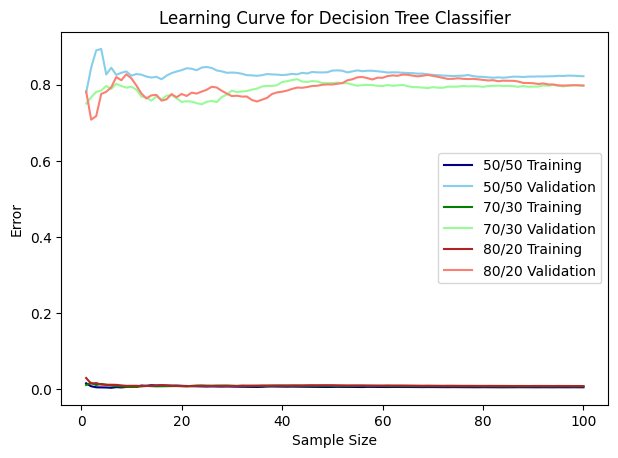

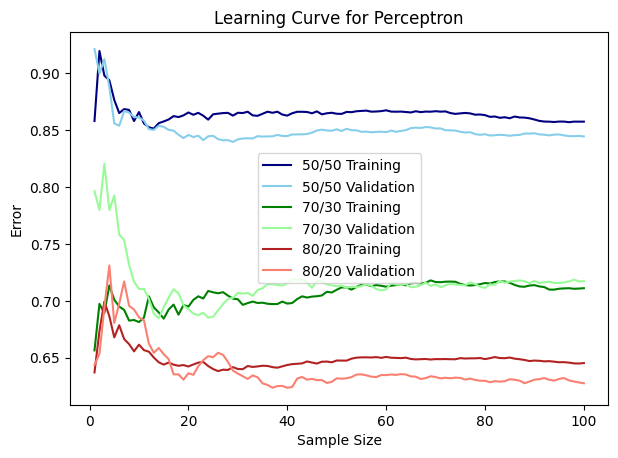

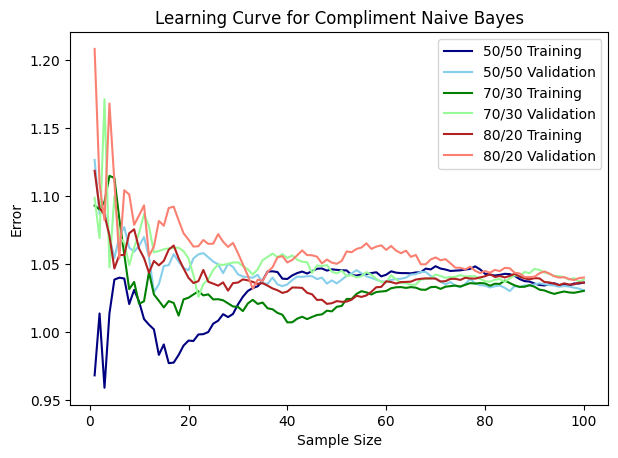

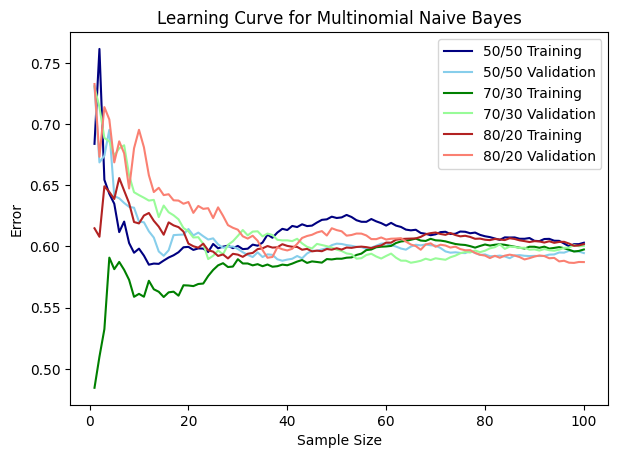

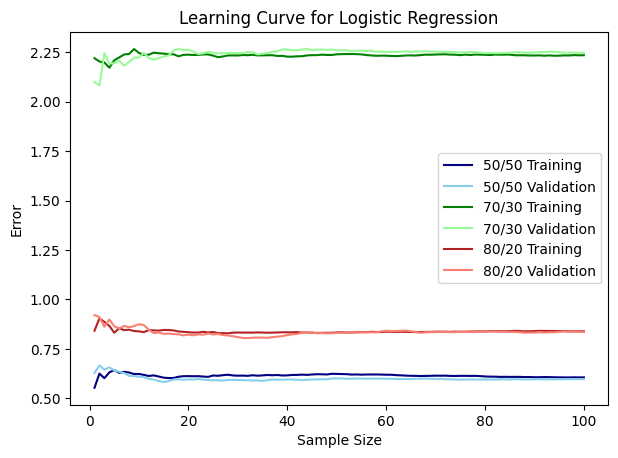

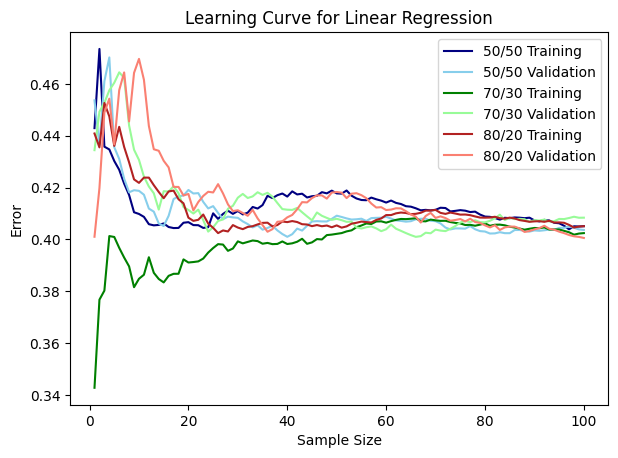

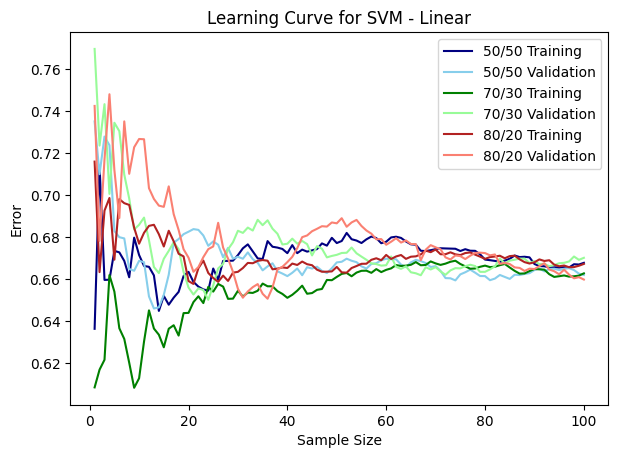

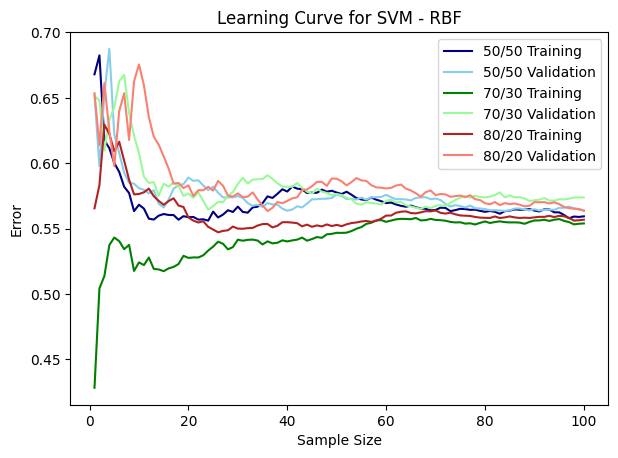

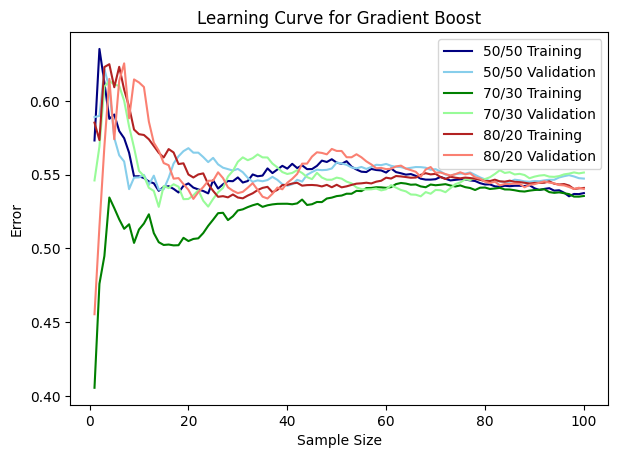

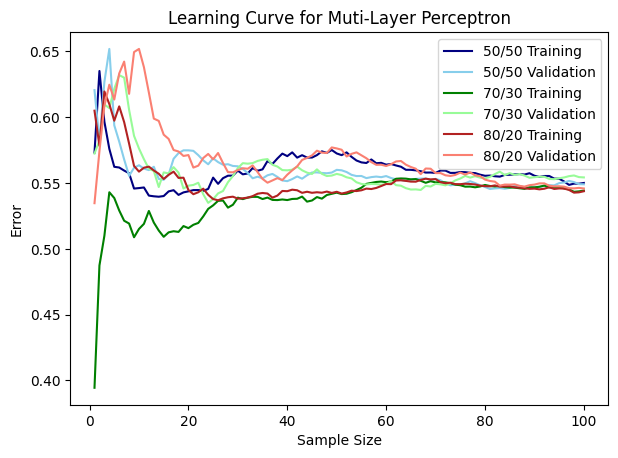

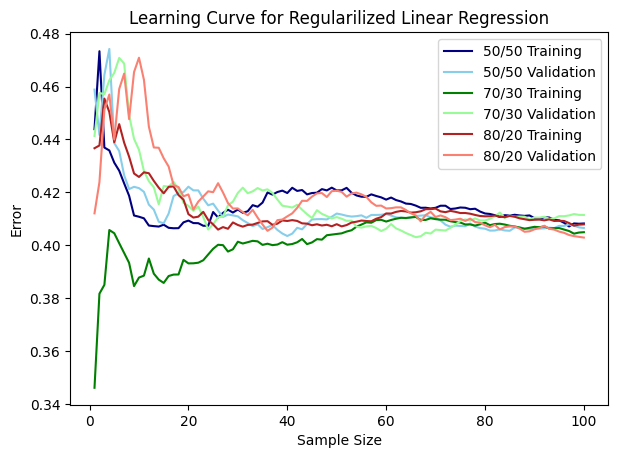

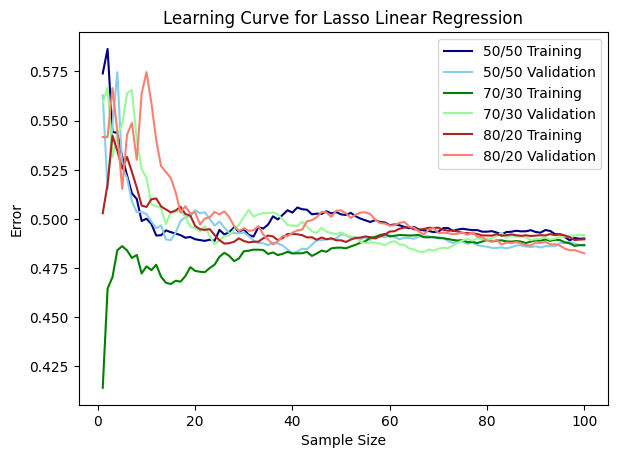

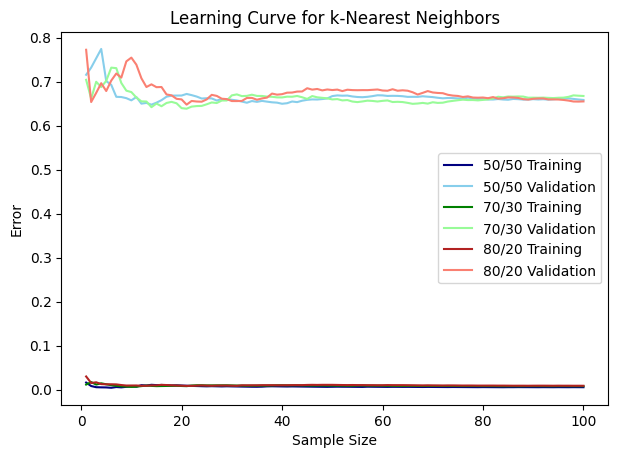

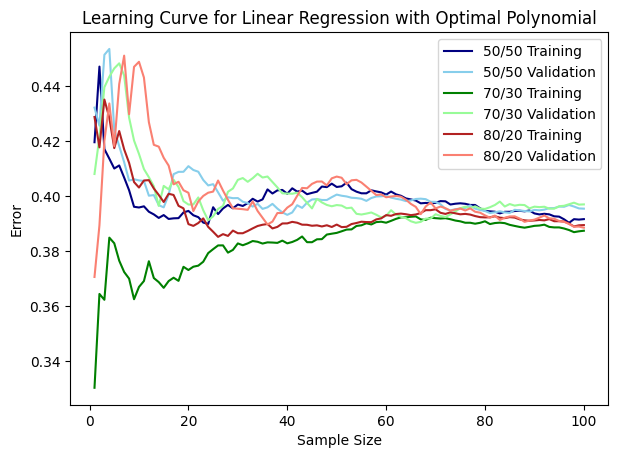

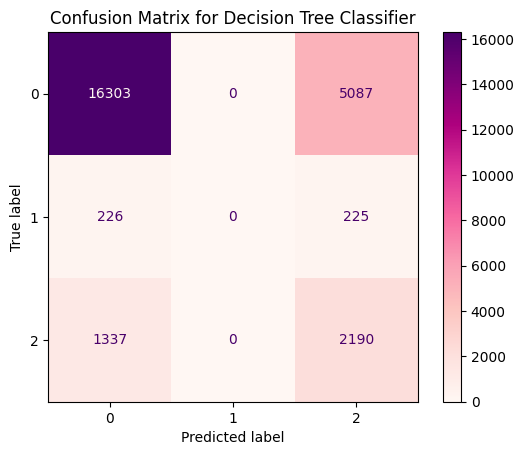

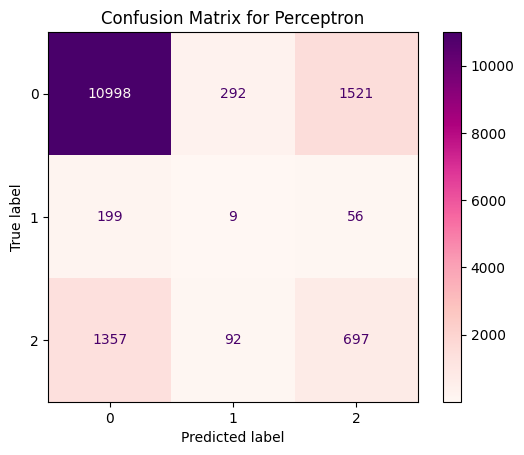

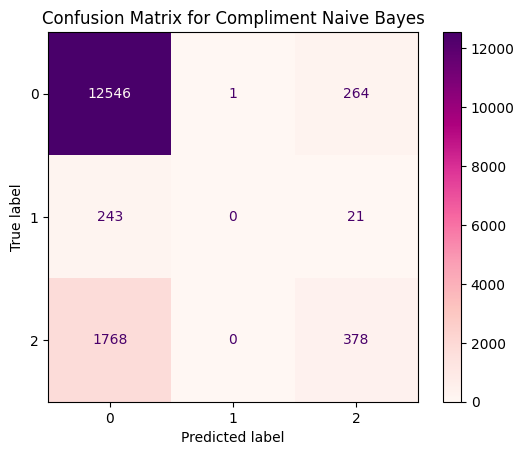

Cannot calculate Confusion Matrix for Regression Problems
Cannot calculate Confusion Matrix for Regression Problems
Cannot calculate Confusion Matrix for Regression Problems


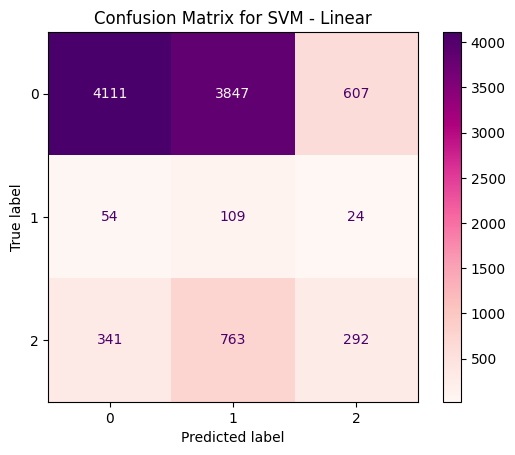

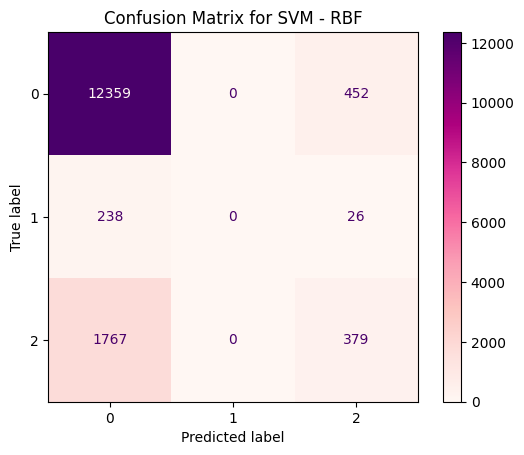

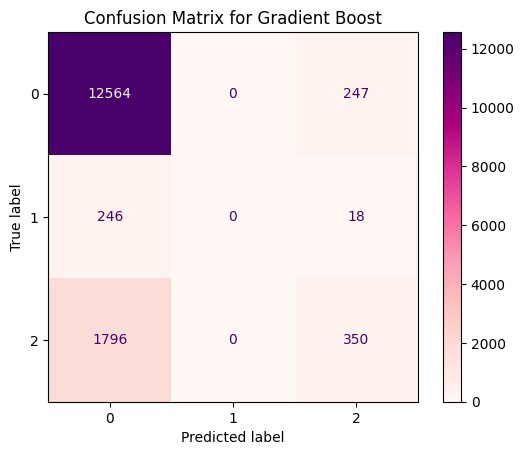

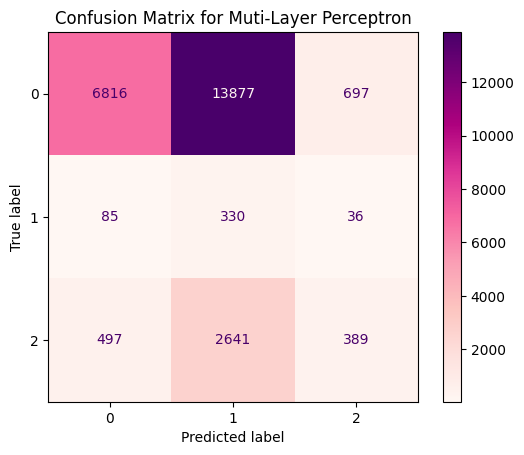

Cannot calculate Confusion Matrix for Regression Problems


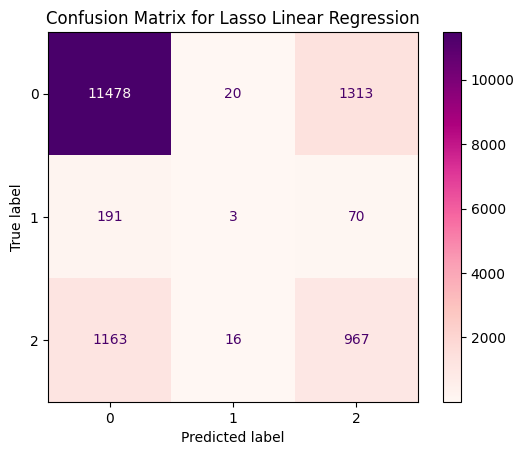

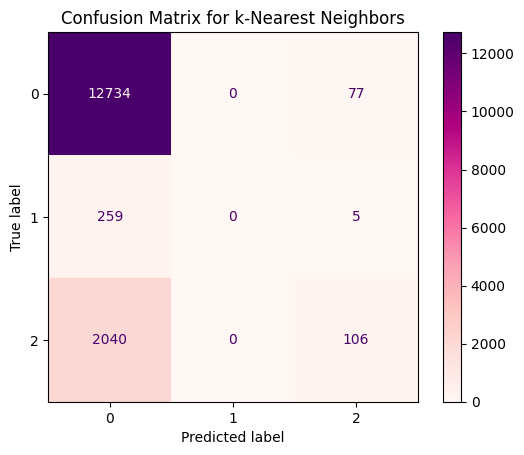

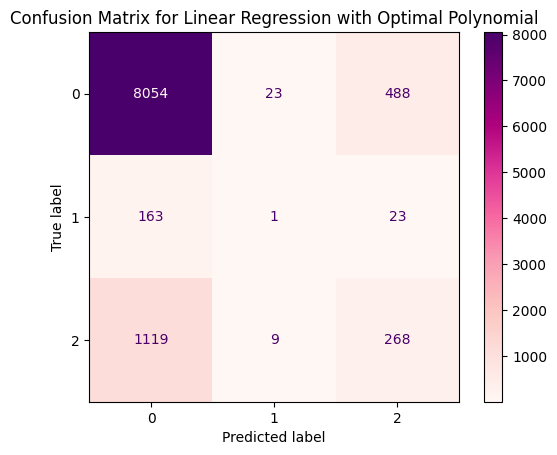

,Model,Split,Error,Generalization
0,Compliment Naive Bayes,"(0.5, 0.5)",0.965313,0.065395
1,Decision Tree Classifier,"(0.7, 0.3)",0.765766,0.032539
2,Gradient Boost,"(0.7, 0.3)",0.530687,0.020722
3,Lasso Linear Regression,"(0.5, 0.5)",0.458958,0.027436
4,Linear Regression,"(0.5, 0.5)",0.384906,0.018745
5,Linear Regression with Optimal Polynomial,"(0.7, 0.3)",0.371915,0.025014
6,Logistic Regression,"(0.8, 0.2)",0.451700,0.383932
7,Multinomial Naive Bayes,"(0.7, 0.3)",0.574324,0.026162
8,Muti-Layer Perceptron,"(0.7, 0.3)",0.530273,0.023961
9,Perceptron,"(0.5, 0.5)",0.504533,0.339641


,Model,Split,Accuracy,Precision,Recall,F1-Score,R2,Error
0,Decision Tree Classifier,"(0.5, 0.5)",0.765471,0.776357,0.765471,0.770765,-6.756181e-01,0.821048
1,Decision Tree Classifier,"(0.5, 0.5)",0.771384,0.780858,0.771384,0.776014,-6.273526e-01,0.797399
2,Decision Tree Classifier,"(0.5, 0.5)",0.767048,0.773340,0.767048,0.770148,-6.675738e-01,0.817107
3,Decision Tree Classifier,"(0.5, 0.5)",0.765865,0.775986,0.765865,0.770819,-6.675738e-01,0.817107
4,Decision Tree Classifier,"(0.5, 0.5)",0.749310,0.770909,0.749310,0.759650,-7.713447e-01,0.867954
5,Decision Tree Classifier,"(0.5, 0.5)",0.744974,0.763240,0.744974,0.753796,-8.139792e-01,0.888845
6,Decision Tree Classifier,"(0.5, 0.5)",0.759559,0.782709,0.759559,0.770406,-7.021641e-01,0.834056
7,Decision Tree Classifier,"(0.5, 0.5)",0.774143,0.785391,0.774143,0.779647,-5.782826e-01,0.773354
8,Decision Tree Classifier,"(0.5, 0.5)",0.770899,0.780392,0.770899,0.775548,-6.288022e-01,0.798107
9,Decision Tree Classifier,"(0.5, 0.5)",0.757886,0.778013,0.757886,0.767458,-7.151578e-01,0.840694


In [8]:
i = 0

splits_df = pd.DataFrame(columns=['Model', 
                                  'Split', 
                                  'Error',  
                                  'Generalization', 
                                  'true', 
                                  'pred'])
big_df = pd.DataFrame(columns=['Model', 'Split'])

for model in models:
    print(titles[i])
    pipe = make_pipeline(MinMaxScaler(), model)
    j=0
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fold_df = pd.DataFrame(columns=['Accuracy',
                                    'Precision', 
                                    'Recall', 
                                    'F1-Score', 
                                    'R2'
                                    'Error'],
                                    index=index)
    
    for j in range(len(splits)): # each sample type
      X_train = train[j][0]
      y_train = train[j][1]
      X_test = test[j][0]
      y_test = test[j][1]

      if 'Polynomial' in titles[i]:
        poly_df = pd.DataFrame(columns=['polynomial', 'score'])
        poly = best_poly(X_train, y_train, X_test, y_test)       
        pipe = make_pipeline(MinMaxScaler(),
                             PolynomialFeatures(degree=poly),
                             LinearRegression())
 
      pipe.fit(X_train, y_train)
      
      print(splits[j])

      cv = cross_validate(pipe, 
                          X_train, 
                          y_train,
                          scoring=['accuracy', 
                                    'precision_weighted',
                                    'recall_weighted',
                                    'f1_weighted',
                                    'r2',
                                    'neg_mean_squared_error'], 
                          cv=10) 
      
      pred = pipe.predict(X_test)
      test_error = MSE(y_test, pred)

      # adding absolute value of neg mean squared error so lower error is better, 
      # while CV uses neg_MSE to follow convention of all other metrics that higher is better
      fold_df = pd.concat({'Accuracy':pd.Series(cv['test_accuracy']), 
                            'Precision':pd.Series(cv['test_precision_weighted']),
                            'Recall':pd.Series(cv['test_recall_weighted']),
                            'F1-Score':pd.Series(cv['test_f1_weighted']),
                            'R2' : pd.Series(cv['test_r2']),
                            'Error':pd.Series(abs(cv['test_neg_mean_squared_error']))},
                            axis=1)
      
      splits_df.loc[len(splits_df)] = [titles[i], 
                                      splits[j], 
                                      fold_df['Error'].min(),
                                      abs(fold_df['Error'].min() - test_error),
                                      test[j][1],
                                      pred]
  
      big_df = pd.concat([big_df, fold_df], ignore_index=True, axis=0)
      big_df['Split'].iloc[((i*30)+(j*10)):((i*30)+(j*10)+10)] = str(splits[j])



      fold_df.index = index
      fold_disp = fold_df.style.set_caption(f'Fold Metrics for {titles[i]} with {int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Split')
      print('\n')
      display(fold_disp)
      
      # LEARNING CURVES
      train_scores = get_learning_curve(pipe, X_train, y_train, titles[i])
      test_scores = get_learning_curve(pipe, X_test, y_test, titles[i])
      ax.plot(train_scores['percent'], 
              train_scores['scores'], 
              color=train_colors[j],
              label=f'{int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Training')
      ax.plot(test_scores['percent'], 
              test_scores['scores'],  
              color=test_colors[j],
              label=f'{int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Validation')
      ax.set_xlabel('Sample Size')
      ax.set_ylabel('Error')
      ax.set_title(f'Learning Curve for {titles[i]}')
      ax.legend(loc='best')

      fig.tight_layout(pad=1.5)
      fig.show()

      j += 1

    big_df['Model'].iloc[(i*30):((i*30)+30)] = titles[i]
    i+=1  

best = (splits_df.loc[splits_df.groupby('Model')['Error'].idxmin()])

for b in range(len(best)):
  try:
    ConfusionMatrixDisplay.from_predictions(y_true=best.iloc[b]['true'], 
                                            y_pred=best.iloc[b]['pred'],
                                            cmap='RdPu')
    plt.title(f'Confusion Matrix for {titles[b]}')
    plt.show()
  except:
    print('Cannot calculate Confusion Matrix for Regression Problems')
  

best = best.drop(['true', 'pred'], axis=1)
best.reset_index(inplace=True, drop=True) 

disp_best = best.style.set_caption(f'Best Split for Each Model')
display(disp_best)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(big_df)